# Blossom Bank Online Payment Fraud Detection
## Introduction
Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.

## Problem definition
With Blossom Bank rendering such financial services online, experiencing fradulent transactions cannot be avoided and steadily on the increase. Thus, the need to build a machine learning model that will be able to detect those transactions that are fraudulent, help save the bank from lossing money and also maintain a high reputation among its customers.

In [1]:
# Import all necessary libraries 

import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data into dataframe

fraud = pd.read_csv('Online Payment Fraud Detection.csv')
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
# make a copy of the original dataframe
df = fraud.copy()

**Features in the dataset and meaning**

- **step:** represents a unit of time where 1 step equals 1 hour.
- **type:** type of online transaction
- **amount:** the amount of the transaction
- **nameOrig:** customer starting the transaction
- **oldbalanceOrg:** balance before the transaction
- **newbalanceOrig:** balance after the transaction
- **nameDest:** recipient of the transaction
- **oldbalanceDest:** initial balance of recipient before the transaction
- **newbalanceDest:** the new balance of the recipient after the transaction
- **isFraud:** fraud transaction

## Data Inspection

In [4]:
# Check the shape of the dataset - (rows, columns)
df.shape

(1048575, 10)

- The dataset contains 1048575 rows and 10 columns

In [5]:
# Check for missing values

df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

- There are no missing values in the dataset

In [6]:
# Check data type of each columns

df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

- All columns are represented in their correct data type.

In [7]:
# overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [8]:
# statistical analysis
df.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


## Data Cleaning

In [9]:
# rename some columns for easy referencing
df.rename(columns={'nameOrig':'sender','oldbalanceOrg':'old_bal_sender','newbalanceOrig':'new_bal_sender','nameDest':'recipient','oldbalanceDest':'old_bal_recipient','newbalanceDest':'new_bal_recipient',}, inplace=True)

In [10]:
df.head()

,step,type,amount,sender,old_bal_sender,new_bal_sender,recipient,old_bal_recipient,new_bal_recipient,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## Data Visualization

In this section, we would be visualizing important relationships in the dataset.

### Univariate Analysis
 This has to do with analyzing just one variable seperately.

Text(0.5, 1.0, 'Duration of Transaction')

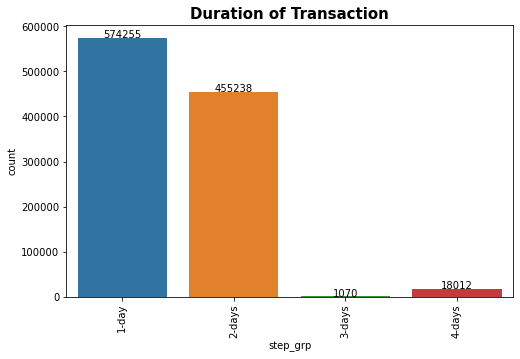

In [11]:
# create a function to group the step into days
def hour(step):
    if step <= 24:
        return "1-day"
    elif step <=48:
        return "2-days"
    elif step <=72:
        return "3-days"
    else: 
        return "4-days"

    
# Create a new column for daily rate of steps
df["step_grp"] = df["step"].apply(hour)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "step_grp", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Duration of Transaction', weight='bold', fontsize=15)

- We can see that most transactions were done within 1 day (24hrs). Some transactions took up to 3 days (72hrs) to process.

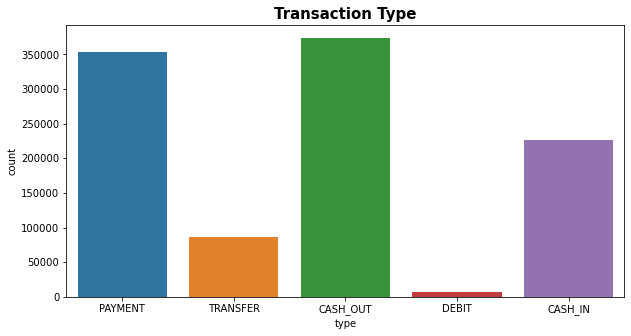

In [12]:
# Plot of online transaction type
plt.figure(figsize = (10,5))
sns.countplot(x = 'type', data = df)
plt.title('Transaction Type', weight='bold', fontsize=15)
plt.show()

- Based on the chart, we can see that cash out was the highest type of online transaction closely followed by payment type and the least being debit.

Text(0.5, 1.0, 'Transaction Amount')

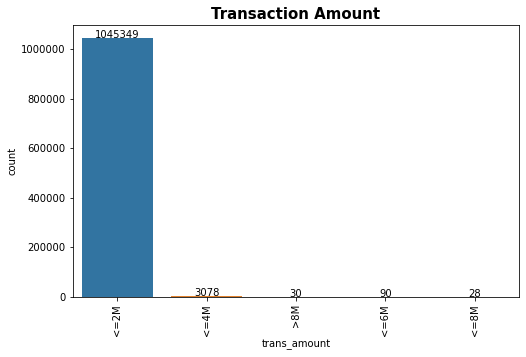

In [13]:
# create a function to group the transaction amount
def amt(amount):
    if amount <= 2000000:
        return "<=2M"
    elif amount <=4000000:
        return "<=4M"
    elif amount <=6000000:
        return "<=6M"
    elif amount <= 8000000:
        return "<=8M"
    else: 
        return ">8M"

    
# Create a new column for age category
df["trans_amount"] = df["amount"].apply(amt)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "trans_amount", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Transaction Amount', weight='bold', fontsize=15)

- The chart shows that most of the amount being transacted were below 2 million followed by transactions less than 4 million and the least amount being transacted were less than 8 million.

Text(0.5, 1.0, 'Old Balance of Sender')

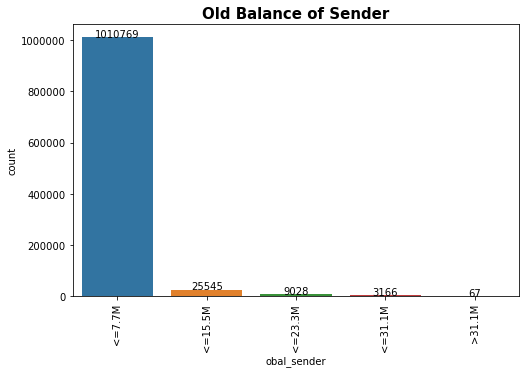

In [14]:
# create a function to group the old account balance of the sender
def obs(old_bal_sender):
    if old_bal_sender <= 7780000:
        return "<=7.7M"
    elif old_bal_sender <=15560000:
        return "<=15.5M"
    elif old_bal_sender <=23340000:
        return "<=23.3M"
    elif old_bal_sender <= 31120000:
        return "<=31.1M"
    else: 
        return ">31.1M"

    
# Create a new column for old balance of sender category
df["obal_sender"] = df["old_bal_sender"].apply(obs)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "obal_sender", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Old Balance of Sender', weight='bold', fontsize=15)

- Most of the account balance the senders had before they made a transaction was less than or equal to 7.7 million followed by balance less than or equal to 15.5 million and the least were balance greater than 31.1 million.

Text(0.5, 1.0, 'Balance after Transaction')

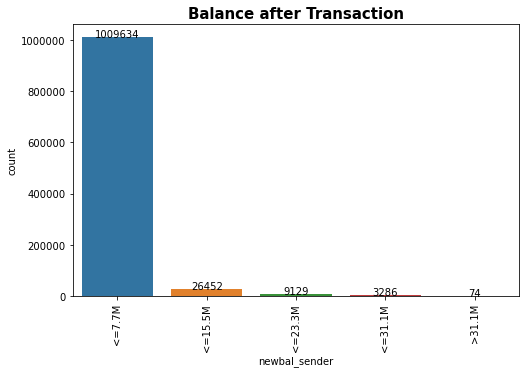

In [15]:
# create a function to group the new account balance of the sender
def nbs(new_bal_sender):
    if new_bal_sender <= 7780000:
        return "<=7.7M"
    elif new_bal_sender <=15560000:
        return "<=15.5M"
    elif new_bal_sender <=23340000:
        return "<=23.3M"
    elif new_bal_sender <= 31120000:
        return "<=31.1M"
    else: 
        return ">31.1M"

    
# Create a new column for new balance of sender category
df["newbal_sender"] = df["new_bal_sender"].apply(nbs)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "newbal_sender", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Balance after Transaction', weight='bold', fontsize=15)

- After carrying out transactions, the number of customers with account balance less than or equal to 7.7 million were more followed by those whose account balance were less than or equal to 15.5 million and the least being those with balance greater than 31.1 million. 

Text(0.5, 1.0, 'Old Balance of Recipient')

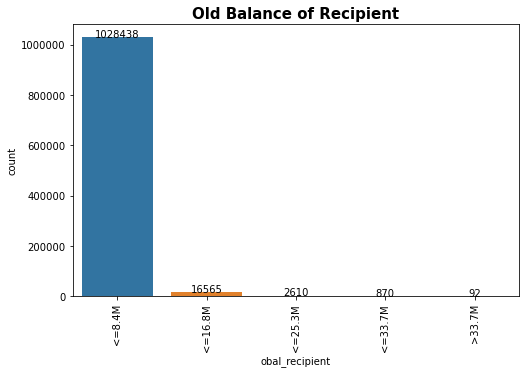

In [16]:
# create a function to group the old account balance of the recipient
def obr(old_bal_recipient):
    if old_bal_recipient <= 8420000:
        return "<=8.4M"
    elif old_bal_recipient <=16840000:
        return "<=16.8M"
    elif old_bal_recipient <=25260000:
        return "<=25.3M"
    elif old_bal_recipient <= 33680000:
        return "<=33.7M"
    else: 
        return ">33.7M"

    
# Create a new column for old balance of recpient category
df["obal_recipient"] = df["old_bal_recipient"].apply(obr)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "obal_recipient", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Old Balance of Recipient', weight='bold', fontsize=15)

- Before the recipients received money, most of them had account balance less than 8.4 million followed by those whose account balance were less than or equal to 16.8 million. The least category were those with accountbalance greater tahn 33.7 million.

Text(0.5, 1.0, 'New Balance of Recipient')

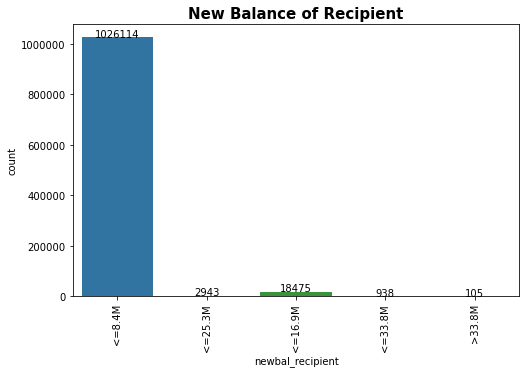

In [17]:
# create a function to group the new account balance of the recipient
def nbr(new_bal_recipient):
    if new_bal_recipient <= 8440000:
        return "<=8.4M"
    elif new_bal_recipient <=16880000:
        return "<=16.9M"
    elif new_bal_recipient <=25320000:
        return "<=25.3M"
    elif new_bal_recipient <= 33760000:
        return "<=33.8M"
    else: 
        return ">33.8M"

    
# Create a new column for new balance of recipient category
df["newbal_recipient"] = df["new_bal_recipient"].apply(nbr)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "newbal_recipient", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('New Balance of Recipient', weight='bold', fontsize=15)

- We can see that recipients with account balance of <=16.9M, <=25.3M, <=33.8M, >33.8M respectively received money either through transfer or cash-in while the balance of recipients with <=8.4M reduced as they carried out payments or debits and cash-out.

Text(0.5, 1.0, 'Fraudulent Transaction')

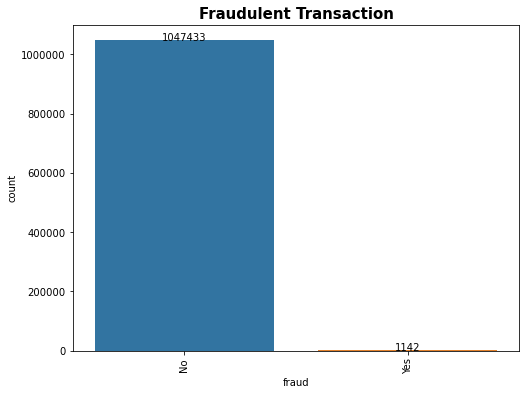

In [18]:
# (1-fraud, 0-not fraud)

# Create Function that categorise Fraud
def fraud(isFraud):
    if isFraud == 1:
        return 'Yes'
    else:
        return 'No'
    
df['fraud'] = df['isFraud'].apply(fraud)

# Visualize fraud column
fig, ax1 = plt.subplots(figsize = (8,6))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "fraud", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Fraudulent Transaction', weight='bold', fontsize=15)


- There were more transactions that were not categorized as fraudulent transactions.

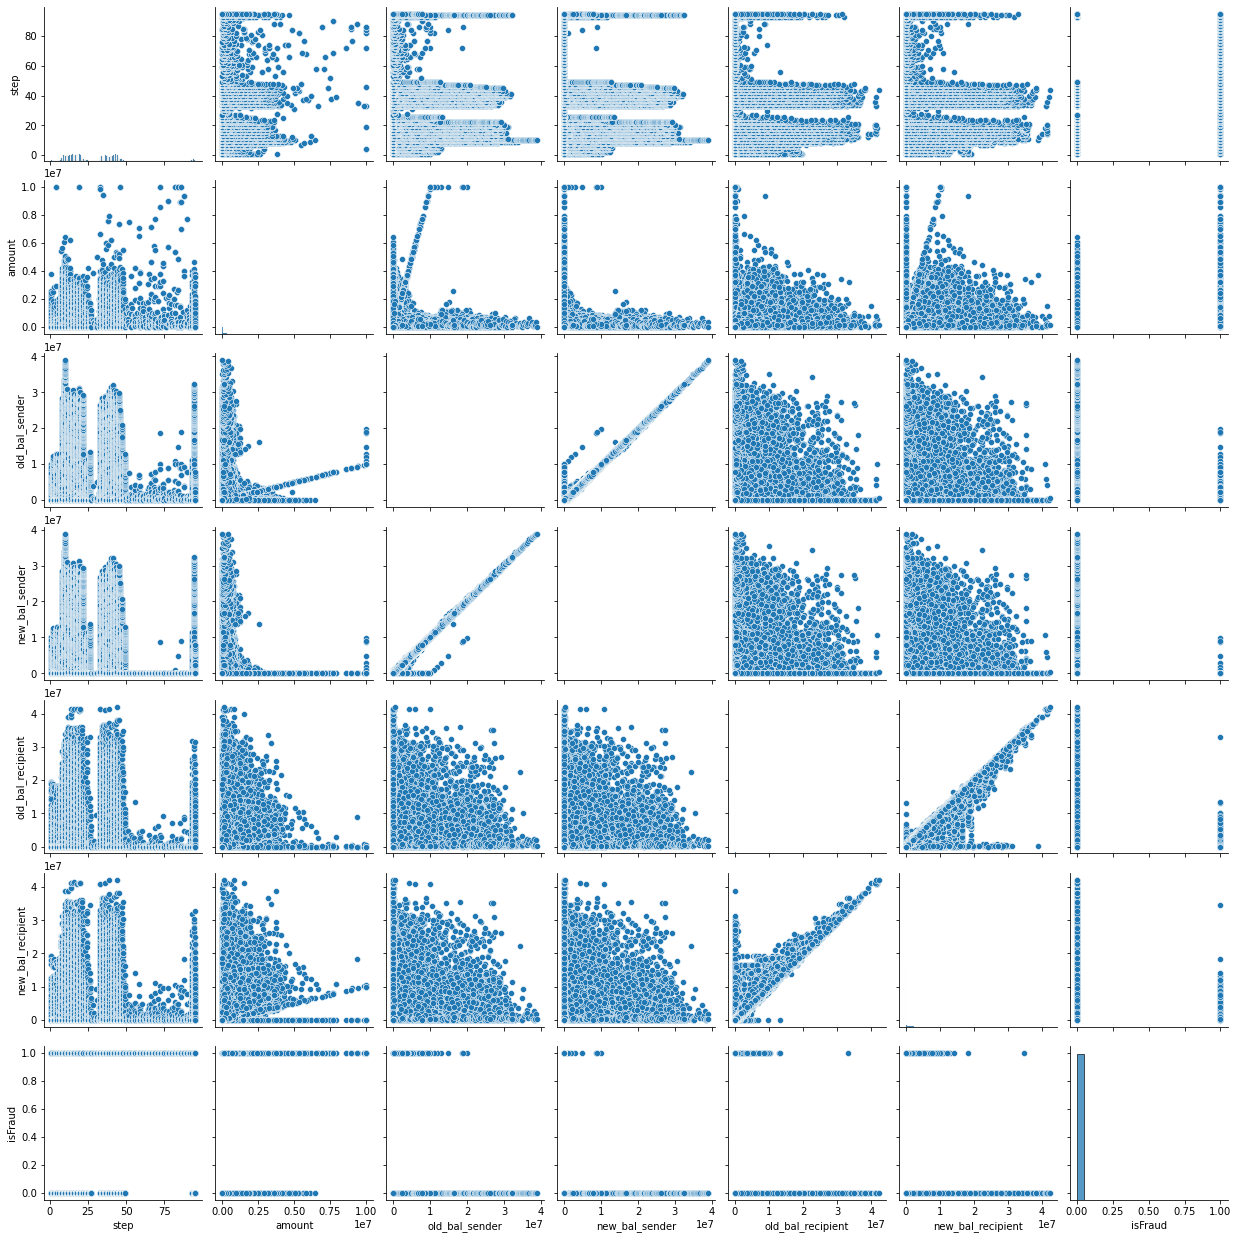

In [19]:
# visualize all the numerical plots
sns.pairplot(df)

## Bivariate Analysis
Analyzing two variables together to see the relationship.

Text(0.5, 1.0, 'Transaction Type vs Transaction Amount')

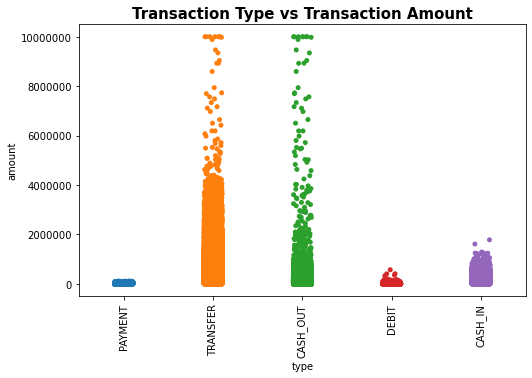

In [20]:

fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.stripplot(ax =ax1, x = "type", y= 'amount', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Transaction Type vs Transaction Amount', weight='bold', fontsize=15)

- We can glean from the graph that transfer type had the highest amount of money involved.

Text(0.5, 1.0, 'Transaction duration against Fraud')

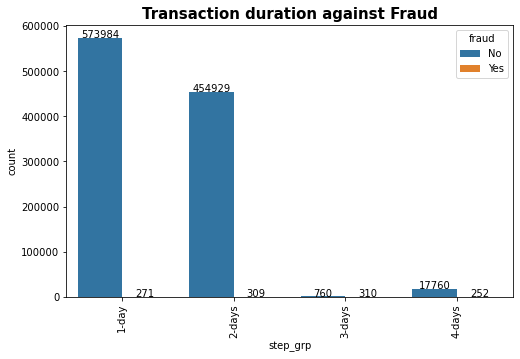

In [21]:
# transaction duration against fraud
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "step_grp", hue= 'fraud', data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Transaction duration against Fraud', weight='bold', fontsize=15)



- In trying to understand if fraudulent transactions occur when it takes either longer time or shorter time to process, we can see that we had fraudulent transactions more between two (2) to three (3) days were that of three (3) days was highest.

Text(0.5, 1.0, 'Fraudulent Transaction against Amount')

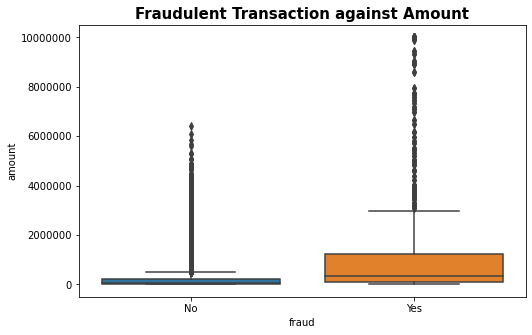

In [22]:
#Visualize amount against fraud
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.boxplot(ax =ax1, x = "fraud", y= 'amount', data = df)
plt.title('Fraudulent Transaction against Amount', weight='bold', fontsize=15)

- Based on the amount being transacted, we can see that most of that belonged to fraudulent transactions. In other other words, the higher the amount transacted the more likely it is to be fraudulent.

Text(0.5, 1.0, 'Transaction duration against Amount')

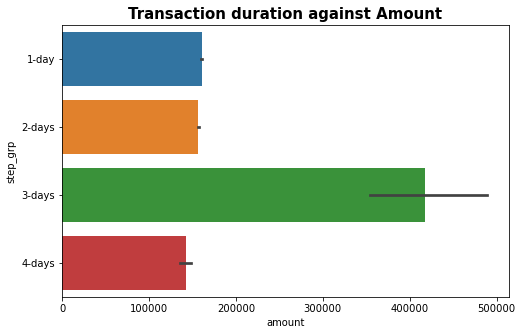

In [23]:
# Transaction duration against amount
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.barplot(ax =ax1, x = "amount", y= 'step_grp', data = df)

plt.title('Transaction duration against Amount', weight='bold', fontsize=15)


- Based on the previous analysis, we could see that most transactions that were classified as fraud invloved large amount of money. With this chart it goes to show further that it took longer for those transactions to take place. As we can see the highest amount took three (3) days.

Text(0.5, 1.0, 'Transaction type vs Transaction duration')

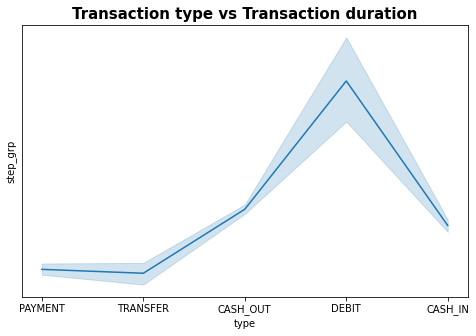

In [24]:
# Transaction type against transaction duration
fig, ax1 = plt.subplots(figsize = (8,5))
sns.lineplot(ax =ax1, x = "type", y= 'step_grp', data = df)
plt.title('Transaction type vs Transaction duration', weight='bold', fontsize=15)

- It can be seen that debit took longer time with regards to the transaction duration. Cash_out and cash_in took almost the same duration.

## Multivariate Analysis
This has to do visualizing and seeing the relationship between three  variables.

Text(0.5, 1.0, 'Transaction duration vs Transaction Amount')

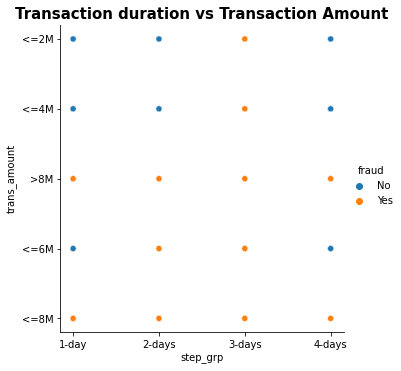

In [25]:

sns.relplot(data=df, y="trans_amount", x="step_grp", hue="fraud")
plt.title('Transaction duration vs Transaction Amount', weight='bold', fontsize=15)

- Transactions that took up tp three (3) days and which involved huge amount of money as well are seen to have been classified as fraudulent transaction, followed by transactions that took up to 2 days. For transactions that took uo to 2 days and were classified as fraud, the maounts transacted were from 6 million and above.

<AxesSubplot:>

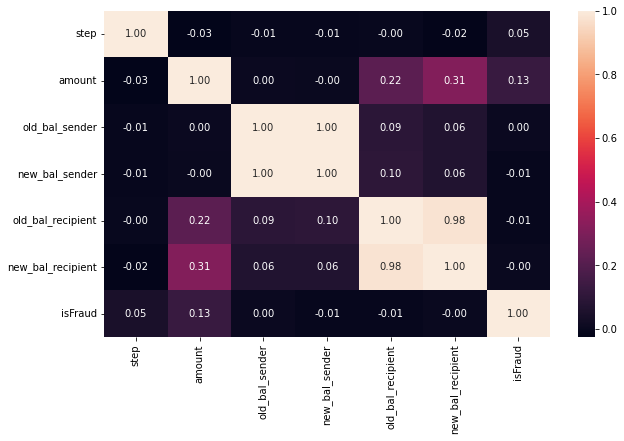

In [26]:
# Visualize the correlataion between each numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

- There is a high positive correlation between new_bal_recipient and old_bal_recipient.
- There is a low positive correlation between new_bal_recipient and amount, and also between old_bal_recipient and amount.
- There is a very low positive correlation between isFraud and amount.

Text(0.5, 1.0, 'Transaction Type vs Amount vs Fraud')

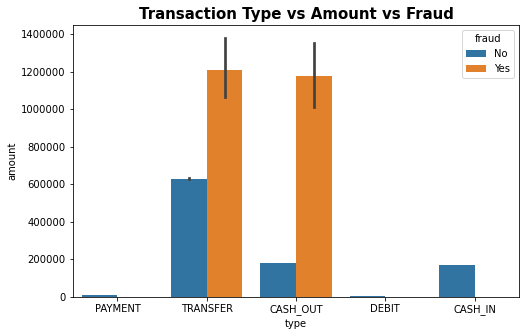

In [27]:
# transaction duration against fraud
fig, ax1 = plt.subplots(figsize = (8,5))
plt.ticklabel_format(style='plain')
viz = sns.barplot(ax =ax1, x = "type", y= 'amount', hue='fraud',data = df)

plt.title('Transaction Type vs Amount vs Fraud', weight='bold', fontsize=15)

- Fraudulent transactions were highest when it had to do with transfers and involved the highest amount of money. This was closely followed by cash_out.

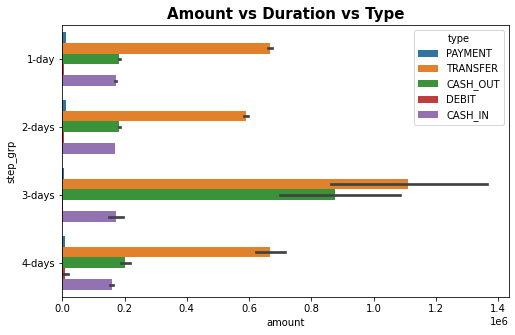

In [28]:
# amount vs duration vs type
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(ax=ax, x='amount', y='step_grp', hue='type',data=df)
plt.title('Amount vs Duration vs Type', weight='bold', fontsize=15)
plt.show()


- All the days when transactions were carried out, transfers involved more money but was highest on the third (3) day. Paymentand debit didnt involve large amount of money throughou the days transactions took place.

## Summary of Findings

- Fraudulent transactions took longer days and that's when we had the highest amount being transacted.
- The most frequent type of transaction from the dataset was cash_out however, transfer was most frequent when it had to do with the amount being transacted.
- Debit type of transaction took longer period of time.

## Data Modeling
This has to do with training a model and evaluating the model.

In [29]:
# confirm if the target column is balanced
df['isFraud'].groupby(df['isFraud']).count()

isFraud
0    1047433
1       1142
Name: isFraud, dtype: int64

- As we can see the target column is imbalanced. With predictions classified as not fraud being more than predictions that were classified as fraud. We would take this into consideration while building our machine learning model.

## Feature engineering
#### One-Hot Encoding
Here categorical variables are going to be converted into a form that will be well suited for machine learning algorithms.

In [30]:
# One-hot encode the categorical column using pd.get_dummies()
dummy = pd.get_dummies(df['type'])
dummy.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [31]:
#joining the encoded variable back to the main dataframe using pd.concat()
df = pd.concat([df,dummy], axis=1)
df.head()

,step,type,amount,sender,old_bal_sender,new_bal_sender,recipient,old_bal_recipient,new_bal_recipient,isFraud,...,obal_sender,newbal_sender,obal_recipient,newbal_recipient,fraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Yes,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,Yes,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,0,0,0,1,0


In [32]:
# drop initial categorical column and new columns that were grouped/created for visulaization

features = ['type', 'sender', 'recipient', 'obal_sender', 'newbal_sender', 'obal_recipient', 'newbal_recipient', 'fraud',
           'step_grp', 'trans_amount']

df = df.drop(features,axis=1)
df.head()

,step,amount,old_bal_sender,new_bal_sender,old_bal_recipient,new_bal_recipient,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


## Select Target

In [33]:
# Choose target column
y = df['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

## Select Features

In [34]:
# Select features by dropping target column
X = df.drop('isFraud', axis=1)
X.head()

,step,amount,old_bal_sender,new_bal_sender,old_bal_recipient,new_bal_recipient,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


## Import ML Algorithms 

In [35]:
#import ML algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm as svm



# Ml metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# To disbale warning
import warnings
warnings.filterwarnings('ignore')

### Train Test Split

In [36]:
# Split into training and testing with split ratio of 80%:20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


### Scale the training and testing set
Since we will be using Logistic regression, it does very well with scaled data.

In [37]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler

In [38]:
#data scaling steps for train dataset
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [39]:
#data scaling steps for test dataset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [40]:
# Initialize the algorithms
LR= LogisticRegression()
KN = KNeighborsClassifier(n_neighbors=5,weights='distance')
RF = RandomForestClassifier()
SVM = svm.LinearSVC()

In [41]:
models = [LR,KN,RF,SVM]

In [42]:
# function to plot confusion matrix
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


For LogisticRegression, Accuracy score is 0.9991989128102424 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.92      0.27      0.42       224

    accuracy                           1.00    209715
   macro avg       0.96      0.64      0.71    209715
weighted avg       1.00      1.00      1.00    209715



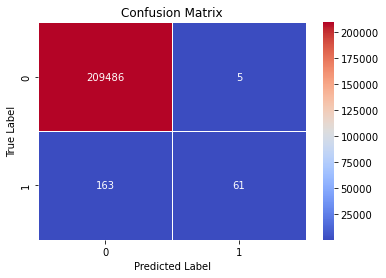


For KNeighborsClassifier, Accuracy score is 0.9995756145244737 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.98      0.62      0.76       224

    accuracy                           1.00    209715
   macro avg       0.99      0.81      0.88    209715
weighted avg       1.00      1.00      1.00    209715



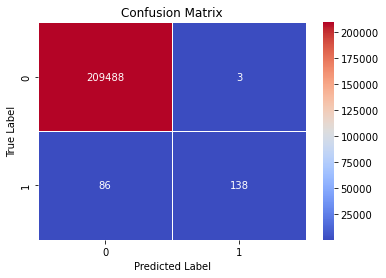


For RandomForestClassifier, Accuracy score is 0.999766349569654 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.95      0.83      0.88       224

    accuracy                           1.00    209715
   macro avg       0.97      0.91      0.94    209715
weighted avg       1.00      1.00      1.00    209715



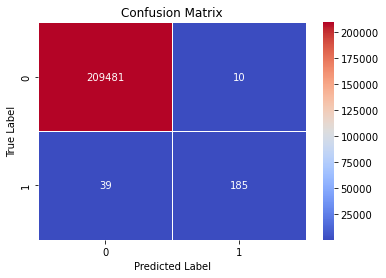


For LinearSVC, Accuracy score is 0.9992084495625015 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.95      0.27      0.42       224

    accuracy                           1.00    209715
   macro avg       0.98      0.64      0.71    209715
weighted avg       1.00      1.00      1.00    209715



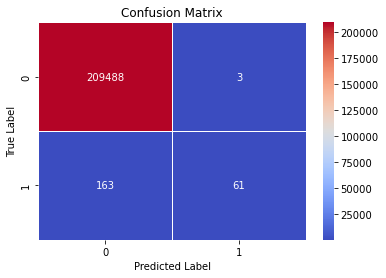

In [43]:
#create function to train a model and evaluate accuracy
def my_train(model,X_train,y_train,X_test,y_test):
    
    #fit the model
    model.fit(X_train,y_train)
  
    
    #predict on the fitted model
    prediction = model.predict(X_test)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    
#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)

## Evaluating Using Cross Validation
What we hope to achive by using cross validation, is for the model to split the training data into multiple blocks with n-number of iterations. It picks a block and use it as the test set. The next iteration would be picking another block of the data and use as the test set.

This gives you an idea of how the model will perform when it sees new data in the real world that it hasn't seen before.

In [44]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, cross_val_score


# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


For LogisticRegression, Accuracy score is 0.9991989128102424 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.92      0.27      0.42       224

    accuracy                           1.00    209715
   macro avg       0.96      0.64      0.71    209715
weighted avg       1.00      1.00      1.00    209715



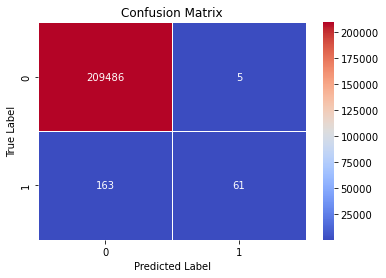


For KNeighborsClassifier, Accuracy score is 0.9995756145244737 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.98      0.62      0.76       224

    accuracy                           1.00    209715
   macro avg       0.99      0.81      0.88    209715
weighted avg       1.00      1.00      1.00    209715



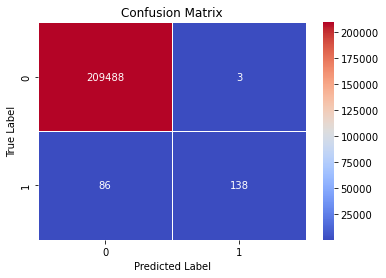


For RandomForestClassifier, Accuracy score is 0.9997615811935245 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.95      0.82      0.88       224

    accuracy                           1.00    209715
   macro avg       0.97      0.91      0.94    209715
weighted avg       1.00      1.00      1.00    209715



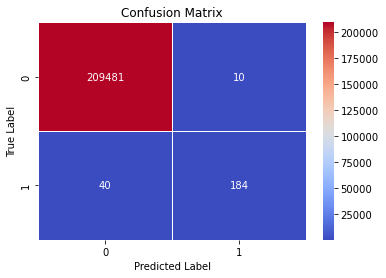


For LinearSVC, Accuracy score is 0.9992084495625015 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.95      0.27      0.42       224

    accuracy                           1.00    209715
   macro avg       0.98      0.64      0.71    209715
weighted avg       1.00      1.00      1.00    209715



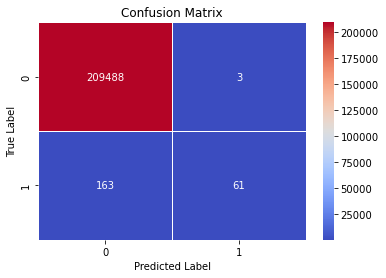

In [45]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    
    score = ['accuracy', 'precision', 'recall']
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=score, cv=cv, n_jobs=-1)
    
    # report performance
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,mean(scores)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    
#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)

## Interpret Results
Interpret the results by assessing accuracy score, precision and recall.

- Based on the various algorithms used, we can see the various **accuracy scores** which tells us how accurate our model is, but this is only considered when the target class is balanced. In this dataset, the ratio of fraudulent transactions to non-fraudulent transactions is 1142:1047433 respectively. So using only accuracy to evaluate our model will not be a good idea as the model with be biased and make accurate predictions about the larger part of the dataset.


- With regards to **precision** it is a measure of the probability that our model is able to accurately predict fraudulent transactions. This has to do with predictions that we get correct but actually are false ( False Positives).


- **Recall** on the other hand, is considered when you have to correctly predict an event that has occured already. It has to do with false predictions when actually they are correct(False Negatives).


In this case, we are considering the model with the highest accuracy and streamline down to precision and recall. Choosing a model with a higher **recall** is better because with regards to fraudulent transactions, we don't want a situation whereby fradulent transactions will scale in our bank thereby giving the bank a bad reputation and causing the financial body to put a sanction on the bank. Also, it can wade off investors from investing in the bank 



## Summary
What model should be deployed to production?

The model that should be deployed to production is **Random Forest model** as it has the highest recall score compared to other algorithms. However, model optimization can help imporove the recall score to give us better predictions.
